# Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

## Loading and Understanding data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [6]:
import warnings 
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [7]:
#reading the data
car_price=pd.read_csv("C:/Users/USER/Downloads/CarPrice_assignment.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
car_price.shape

(205, 26)

In [9]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [10]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Cleaning


In [11]:
#we can also remove carID  as its just a serial number 
car_price.drop(['car_ID'], axis =1, inplace = True)

# As per the  instruction given 
There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [12]:
car_price["CarName"] = car_price["CarName"].str.replace('-', ' ')
car_price.CarName.unique()

car_price["CarName"] = car_price.CarName.map(lambda x: x.split(" ", 1)[0])
#renaming the CarName as the company name
car_price = car_price.rename(columns={'CarName': 'Company_Name'})
car_price.Company_Name.unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'maxda', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce',
       'renault', 'saab', 'subaru', 'toyota', 'toyouta', 'vokswagen',
       'volkswagen', 'vw', 'volvo'], dtype=object)

by observing the unique values some are redundant and name missmatchig(spelling,upper amd lower case.etc.)
that are

       maxda, mazda
       Nissan, nissan,
       porsche, porcshce,
       toyota, toyouta,
       vokswagen,'volkswagen, vw
  so let us replace them

In [13]:
#convering entire column to lower case
car_price.Company_Name = car_price['Company_Name'].str.lower()
#fixing the terms
car_price['Company_Name'] = car_price['Company_Name'].str.replace('maxda','mazda')
car_price['Company_Name'] = car_price['Company_Name'].str.replace('Nissan','nissan')
car_price['Company_Name'] = car_price['Company_Name'].str.replace('porcshce','porsche')
car_price['Company_Name'] = car_price['Company_Name'].str.replace('toyouta','toyota')
car_price['Company_Name'] = car_price['Company_Name'].str.replace('vw','volkswagen')
car_price['Company_Name'] = car_price['Company_Name'].str.replace('vokswagen','volkswagen')

car_price.Company_Name.unique()





array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
#numerical variable in dataframe
numeric_var=car_price.select_dtypes(include=['int64', 'float64']).columns
numeric_var

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [15]:
car_price_frist_8=car_price[['symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize']]

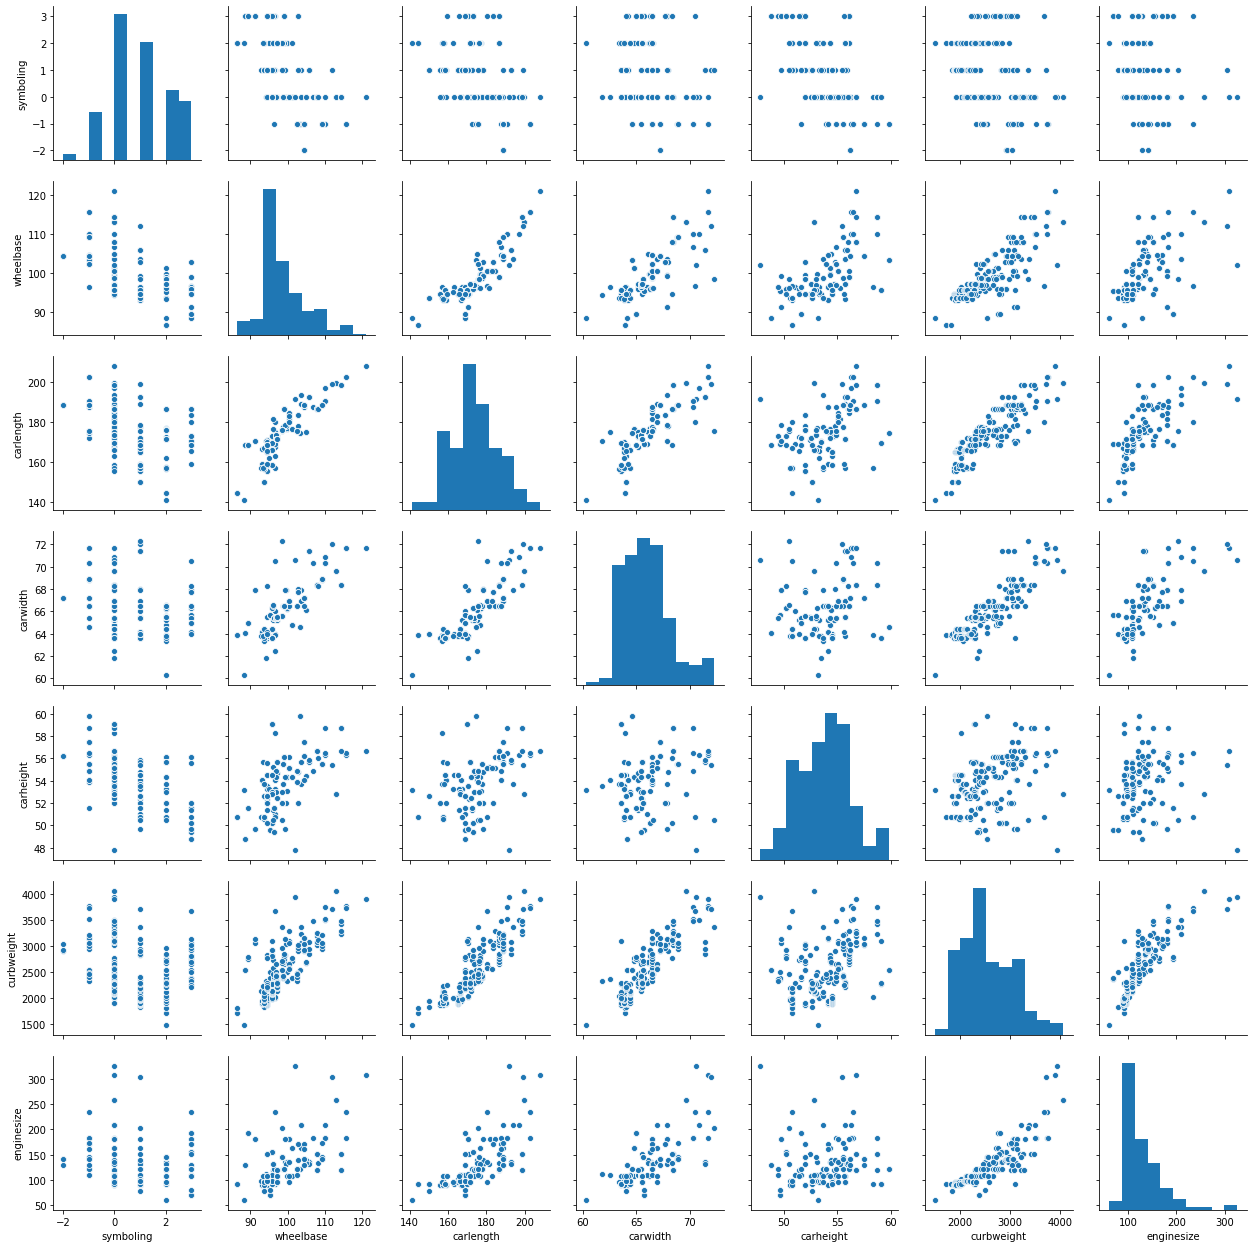

In [16]:
#visualising the first 8 numerical variables
sns.pairplot(car_price_frist_8)
plt.show()

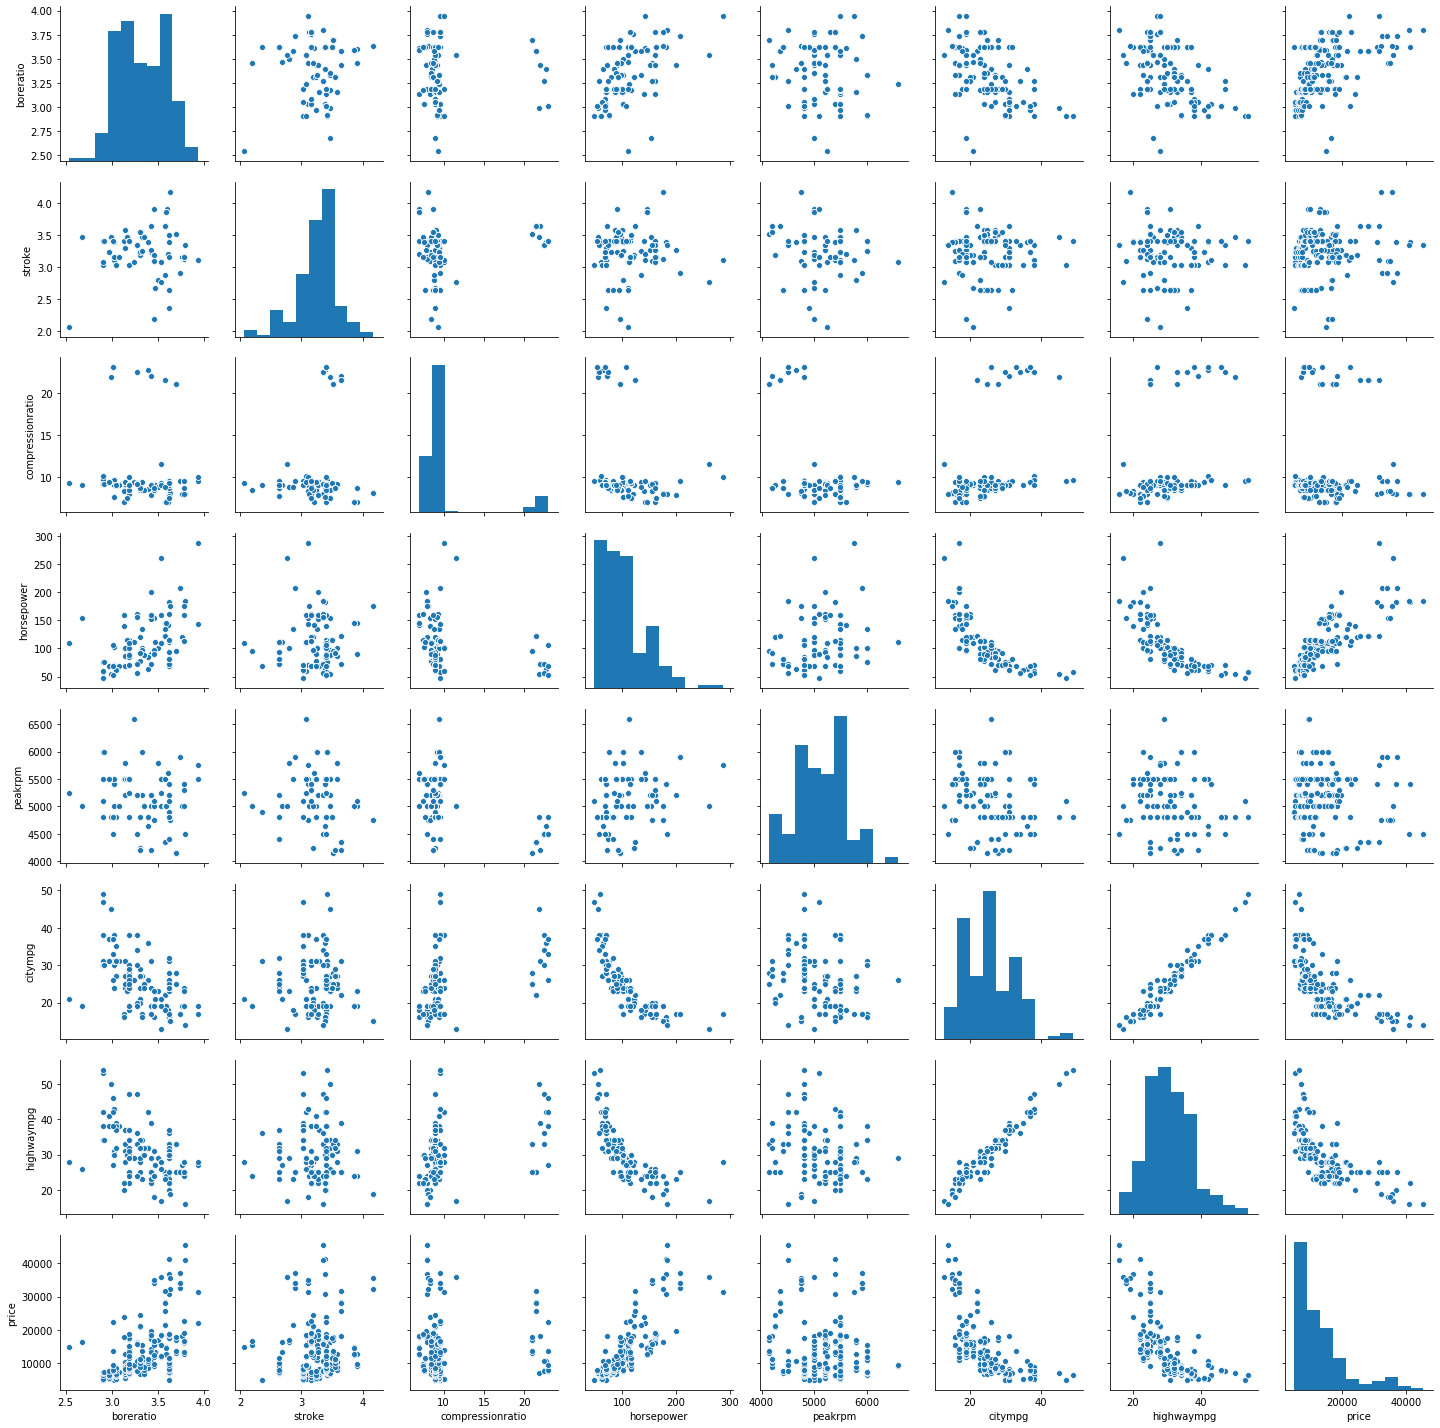

In [17]:
#visualising the last 8 numerical variables
car_price_1ast_8=car_price[['boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
sns.pairplot(car_price_1ast_8)
plt.show()

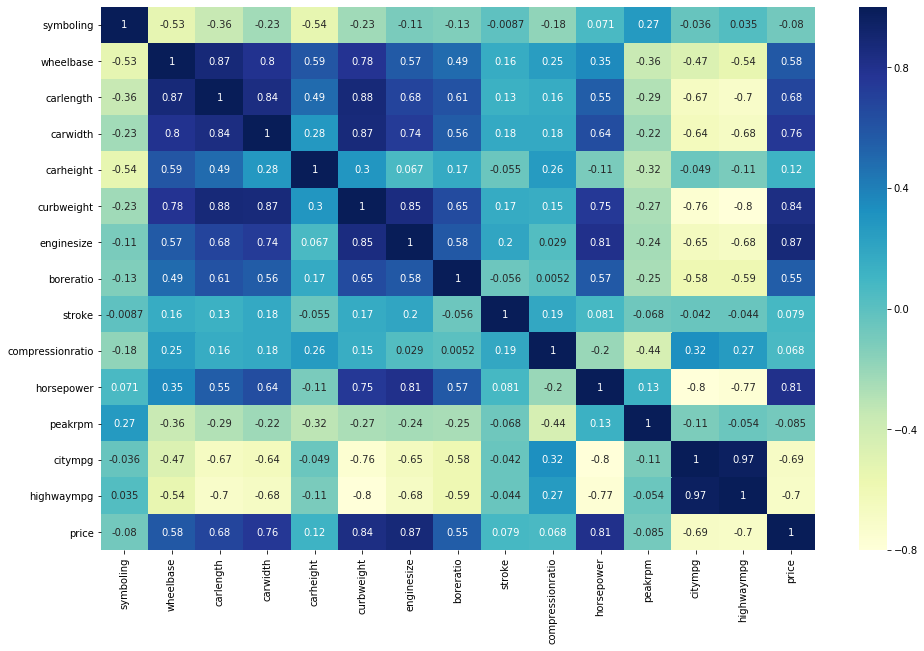

In [18]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(car_price.corr(), annot = True, cmap="YlGnBu")
plt.show()

from the above 2 plot we can obeserve citympg and highwaympg are highly correalated..i.e 0.97.let us check with price


C:\Users\USER\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


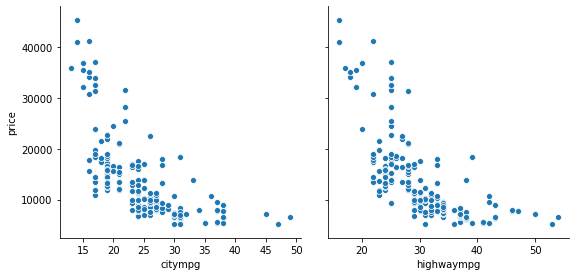

In [19]:
sns.pairplot(car_price, x_vars=['citympg','highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()



citympg and highwaympg are -vely correlated and  significance on price of the car.



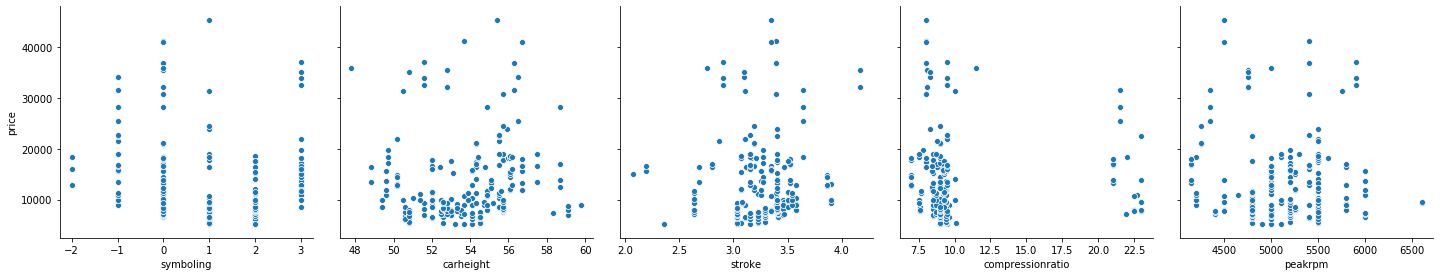

In [20]:
sns.pairplot(car_price, x_vars=['symboling','carheight', 
        'stroke', 'compressionratio',
       'peakrpm'], y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()


'symboling','carheight',  'stroke', 'compressionratio','peakrpm' are not significant for analysis .so let us drop them

In [21]:
car_price.drop(['symboling','carheight',  'stroke', 'compressionratio','peakrpm'], axis =1, inplace = True)


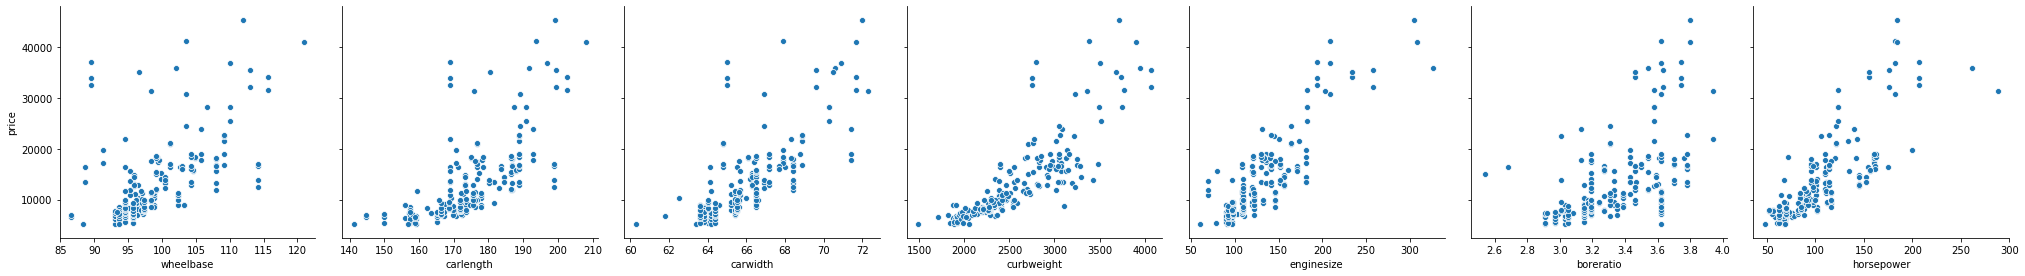

In [22]:
sns.pairplot(car_price, x_vars=['wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'boreratio', 
       'horsepower'],
       y_vars='price',size=4, aspect=1, kind='scatter')
plt.show()

## Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [23]:
#categorical variables in a dateframe
cat_var = [key for key in dict(car_price.dtypes)
             if dict(car_price.dtypes)[key] in ['object'] ] # Categorical Varible
cat_var

['Company_Name',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

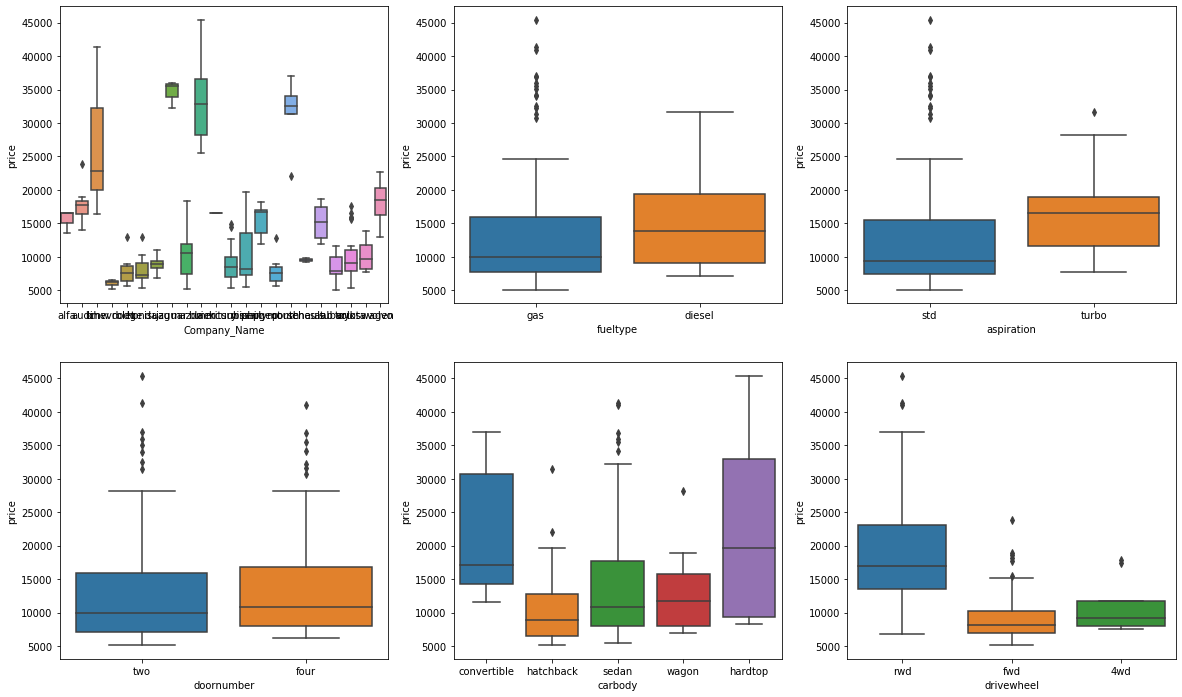

In [24]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Company_Name', y = 'price', data = car_price)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.show()


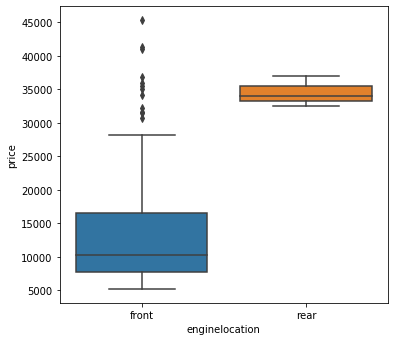

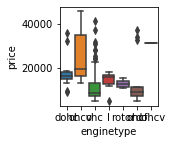

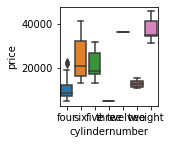

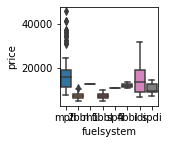

In [25]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.show()
plt.subplot(2,3,2)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.show()
plt.subplot(2,3,2)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.show()
plt.subplot(2,3,3)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.show()

<Figure size 1800x432 with 0 Axes>

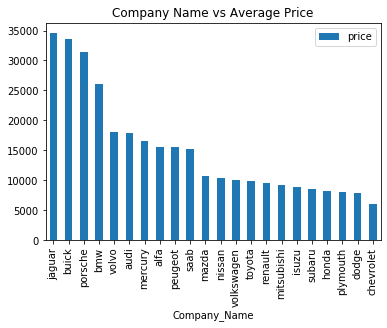

In [26]:
#car_price['Company_Name'].unique()
plt.figure(figsize=(25, 6))
#plt1 =car_price.Company_Name.value_counts().plot('bar')
#plt1.set(xlabel = 'company', ylabel='Frequency of company')


df = pd.DataFrame(car_price.groupby(['Company_Name'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()



#### Jaguar and Buick have highest average price.

In [27]:
car_price['fueltype'].unique()
car_price['fueltype'] = car_price['fueltype'].map({'gas': 1, 'diesel': 0})

car_price['aspiration'].unique()
car_price['aspiration'] = car_price['aspiration'].map({'std': 1, 'turbo': 0})

car_price['doornumber'].unique()
car_price['doornumber'] = car_price['doornumber'].map({'two': 1, 'four': 0})

car_price['enginelocation'].unique()
car_price['enginelocation'] = car_price['enginelocation'].map({'front': 1, 'rear': 0})



In [28]:
#finding unique values 
car_price['Company_Name'].unique()
car_price['carbody'].unique()
car_price['drivewheel'].unique()
car_price['enginetype'].unique()
car_price['cylindernumber'].unique()
car_price['fuelsystem'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

### Dummy variables

In [29]:
def dummies(column,car_price):
    status = pd.get_dummies(car_price[column], drop_first = True)
    car_price= pd.concat([car_price, status], axis = 1)
    car_price.drop([column], axis = 1, inplace = True)
    return car_price
car_price=dummies('Company_Name',car_price)
car_price=dummies('carbody',car_price)
car_price=dummies('drivewheel',car_price)
car_price=dummies('enginetype',car_price)
car_price=dummies('cylindernumber',car_price)
car_price=dummies('fuelsystem',car_price)
car_price


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,1,1,1,88.6,168.8,64.1,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,88.6,168.8,64.1,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,94.5,171.2,65.5,2823,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,1,1,0,1,99.8,176.6,66.2,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,99.4,176.6,66.4,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,1,0,1,109.1,188.8,68.9,2952,141,3.78,...,0,0,0,0,0,0,0,1,0,0
201,1,0,0,1,109.1,188.8,68.8,3049,141,3.78,...,0,0,0,0,0,0,0,1,0,0
202,1,1,0,1,109.1,188.8,68.9,3012,173,3.58,...,0,0,0,0,0,0,0,1,0,0
203,0,0,0,1,109.1,188.8,68.9,3217,145,3.01,...,0,0,0,0,0,1,0,0,0,0


# Splitting the Data into Training and Testing Sets



As you know, the first basic step for regression is performing a train-test split.

In [30]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price','citympg','highwaympg']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
df_train.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,1,1,0,1,0.244828,0.426016,0.291667,0.272692,0.139623,0.230159,...,0,0,0,1,0,0,0,0,0,0
125,1,1,1,1,0.272414,0.452033,0.666667,0.500388,0.339623,1.000000,...,0,0,0,0,0,0,0,1,0,0
166,1,1,1,1,0.272414,0.448780,0.308333,0.314973,0.139623,0.444444,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,0.068966,0.450407,0.316667,0.411171,0.260377,0.626984,...,0,0,0,0,0,0,0,1,0,0
199,1,0,0,1,0.610345,0.775610,0.575000,0.647401,0.260377,0.746032,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
#num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio']

#df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

#df_train.head()

### Dividing into X and Y sets for the model building


In [35]:
y_train = df_train.pop('price')
X_train = df_train

# Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 43),
 ('aspiration', False, 34),
 ('doornumber', False, 46),
 ('enginelocation', True, 1),
 ('wheelbase', False, 17),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 9),
 ('horsepower', True, 1),
 ('citympg', False, 30),
 ('highwaympg', False, 7),
 ('audi', False, 18),
 ('bmw', True, 1),
 ('buick', True, 1),
 ('chevrolet', False, 41),
 ('dodge', False, 32),
 ('honda', False, 25),
 ('isuzu', False, 20),
 ('jaguar', True, 1),
 ('mazda', False, 42),
 ('mercury', False, 48),
 ('mitsubishi', False, 24),
 ('nissan', False, 36),
 ('peugeot', False, 21),
 ('plymouth', False, 31),
 ('porsche', True, 1),
 ('renault', False, 35),
 ('saab', False, 14),
 ('subaru', False, 12),
 ('toyota', False, 39),
 ('volkswagen', False, 47),
 ('volvo', False, 10),
 ('hardtop', False, 3),
 ('hatchback', False, 2),
 ('sedan', False, 4),
 ('wagon', True, 1),
 ('fwd', False, 44),
 ('rwd', False, 29),
 ('dohcv', False,

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'carwidth', 'curbweight', 'horsepower', 'bmw',
       'buick', 'jaguar', 'porsche', 'wagon', 'three'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'enginesize', 'boreratio', 'citympg', 'highwaympg', 'audi', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan', 'fwd', 'rwd',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'twelve', 'two', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

#  Building a linear model
Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

### model1

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]


In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [43]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [44]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     174.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.91e-71
Time:                        20:00:44   Log-Likelihood:                 206.89
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     132   BIC:                            -359.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2464      0.074      3.


Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).
Maybe we could drop some?
We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

# Checking VIF


In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,224.04
3,curbweight,8.23
2,carwidth,5.62
4,horsepower,3.69
8,porsche,2.02
1,enginelocation,1.63
6,buick,1.42
7,jaguar,1.40
9,wagon,1.23
5,bmw,1.14


In [46]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe= X_train_rfe.drop('three', 1,)

### model2

In [47]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     189.0
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.97e-71
Time:                        20:00:49   Log-Likelihood:                 204.56
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     133   BIC:                            -359.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2461      0.075      3.

## Checking VIF

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,224.04
3,curbweight,8.22
2,carwidth,5.47
4,horsepower,3.69
8,porsche,2.01
1,enginelocation,1.63
6,buick,1.41
7,jaguar,1.40
9,wagon,1.23
5,bmw,1.14


In [49]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe= X_train_rfe.drop('wagon', 1,)

## model3 

In [50]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm3= sm.OLS(y_train,X_train_rfe).fit() # Running the linear model
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     206.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.03e-71
Time:                        20:00:56   Log-Likelihood:                 202.05
No. Observations:                 143   AIC:                            -386.1
Df Residuals:                     134   BIC:                            -359.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2513      0.076      3.

## Checking VIF

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,223.80
3,curbweight,6.84
2,carwidth,5.12
4,horsepower,3.48
8,porsche,1.99
1,enginelocation,1.62
6,buick,1.40
7,jaguar,1.36
5,bmw,1.11


In [52]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe= X_train_rfe.drop('porsche', 1,)

## model4

In [53]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm4= sm.OLS(y_train,X_train_rfe).fit() # Running the linear model
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     229.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.13e-71
Time:                        20:01:03   Log-Likelihood:                 199.73
No. Observations:                 143   AIC:                            -383.5
Df Residuals:                     135   BIC:                            -359.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3328      0.066      5.

## Checking VIF

In [54]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,165.85
3,curbweight,6.21
2,carwidth,4.83
4,horsepower,2.93
6,buick,1.39
7,jaguar,1.34
1,enginelocation,1.15
5,bmw,1.10


In [55]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe= X_train_rfe.drop('curbweight', 1,)

### model5

In [56]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm5= sm.OLS(y_train,X_train_rfe).fit() # Running the linear model
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     242.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           5.02e-70
Time:                        20:01:11   Log-Likelihood:                 192.73
No. Observations:                 143   AIC:                            -371.5
Df Residuals:                     136   BIC:                            -350.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3330      0.069      4.

In [57]:
# REF
#y_train_price = lm5.predict(X_train_rfe)
# Plot the histogram of the error terms
#fig = plt.figure()
#sns.distplot((y_train - y_train_price), bins = 20)
#fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
#plt.xlabel('Errors', fontsize = 18) 

#making prediction for test data
#num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price','citympg','highwaympg']

#df_test[num_vars] = scaler.transform(df_test[num_vars])
#spliting data
#y_test = df_test.pop('price')
#X_test = df_test
#X_train_rfe = X_train_rfe.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
#X_test_new = sm.add_constant(X_test_new)
# Making predictions
#y_pred = lm6.predict(X_test_new)
#model evalution
#from sklearn.metrics import r2_score
#r2_score(y_test, y_pred)


## Having r2squre 0.914 and adjusted r2 square 0.91 for train data and r2 0.91 for test is a good model,but having less variables is good model,
so let us remove one more varibal

## Checking VIF

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,165.85
2,carwidth,2.56
3,horsepower,2.51
5,buick,1.32
6,jaguar,1.21
1,enginelocation,1.15
4,bmw,1.07


In [59]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe= X_train_rfe.drop('horsepower', 1,)

### model6

In [60]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)
lm6= sm.OLS(y_train,X_train_rfe).fit() # Running the linear model
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     188.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.27e-59
Time:                        20:01:20   Log-Likelihood:                 164.64
No. Observations:                 143   AIC:                            -317.3
Df Residuals:                     137   BIC:                            -299.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5103      0.080      6.

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [61]:
y_train_price = lm6.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

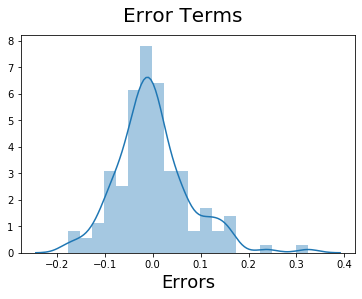

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final

#### Applying the scaling on the test sets

In [63]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength',
            'carwidth','price','citympg','highwaympg']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,0.435484,0.967742,0.437764,0.559481,0.480376,0.428470,0.265673,0.556580,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.179488,0.162820,0.228484,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.128394,0.067925,-0.111111,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.313793,0.459350,0.358333,0.305275,0.177358,0.404762,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.387931,0.547967,0.441667,0.406129,0.226415,0.563492,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.570690,0.719919,0.516667,0.564876,0.316038,0.746032,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,0.935609,0.932075,0.888889,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test


In [65]:
y_test = df_test.pop('price')
X_test = df_test

In [66]:
X_train_rfe = X_train_rfe.drop('const',axis=1)

In [67]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]


In [68]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [69]:
# Making predictions
y_pred = lm6.predict(X_test_new)

## Model Evaluation

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8583848286221394

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

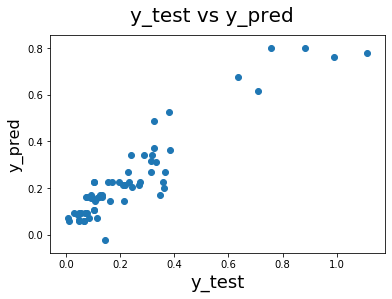

In [71]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Evaluation of the model using Statistics

In [72]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     188.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.27e-59
Time:                        20:01:43   Log-Likelihood:                 164.64
No. Observations:                 143   AIC:                            -317.3
Df Residuals:                     137   BIC:                            -299.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5103      0.080      6.

## Inference :

 


1.R-sqaured and Adjusted R-squared (extent of fit) - 0.873 and 0.869 - 87% variance explained. 

2.F-stats and Prob(F-stats) (overall model fit) - 188.8 and 1.27e-59(approx. 0.0) - Model fit is significant and explained 87% 
3.variance is just not by chance. p-values for all the coefficients seem to be less than the significance level of 0.00.which are near to 0.05. - meaning that all the predictors are statistically significant.